<a href="https://colab.research.google.com/github/Isha09a/Drug_Sideeffect_classification_model/blob/main/Drug_side_effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

#DataSet

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
# First five rows
data.head()

,Name,Age,Gender,Race,SideEffects
0,Dakota Soto,62,M,Hawaiian,Headache
1,Rachael Rubio,69,F,Black,Yellow Skin
2,Heather Giles,47,M,White,Vomiting
3,Russell Malone,82,M,Black,Allergic Reaction
4,Tina Quinn,76,M,Hawaiian,Headache


In [ ]:

# Last five rows
data.tail()

,Name,Age,Gender,Race,SideEffects
399995,Aaron Frey,77,F,American,Allergic Reaction
399996,Zoe Garcia,66,M,White,Stomach Ache
399997,Roger Berry,29,F,Asian,Diarrhoea
399998,Charles Espinoza,81,F,Hawaiian,Diarrhoea
399999,Jean Swanson,-22,F,American,Vomiting


In [ ]:

# Columns
data.columns

Index(['Name', 'Age', 'Gender', 'Race', 'SideEffects'], dtype='object')

In [ ]:
# Rows and columns
data.shape

(400000, 5)

In [ ]:
# Datatypes
data.dtypes

Name           object
Age             int64
Gender         object
Race           object
SideEffects    object
dtype: object

In [ ]:
# More information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         400000 non-null  object
 1   Age          400000 non-null  int64 
 2   Gender       399988 non-null  object
 3   Race         399965 non-null  object
 4   SideEffects  399923 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


#Data Cleaning

In [ ]:
# Null value count
data.isnull().sum()

Name            0
Age             0
Gender         12
Race           35
SideEffects    77
dtype: int64

In [ ]:
# Unique value count
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 399988 

Age : 86 

Gender : 2 

Race : 6 

SideEffects : 9 



In [ ]:
# Show duplicate rows
data.duplicated().sum()
# Remove duplicates
data = data.drop_duplicates()

In [ ]:
# Null value count
data.isnull().sum()

Name            0
Age             0
Gender         12
Race           35
SideEffects    77
dtype: int64

In [ ]:
# Removing rows with null data
data=data.dropna(axis=0)

In [ ]:
# Null value count
data.isnull().sum()

Name           0
Age            0
Gender         0
Race           0
SideEffects    0
dtype: int64

In [ ]:
# Check invalid ages
invalid_age_count = (data['Age'] < 18).sum()
print('Count of invalid ages : ', invalid_age_count)

Count of invalid ages :  25


In [ ]:
# Remove invalid age data
data = data.loc[(data['Age'] >= 18) & (data['Age'] <= 90)]

In [ ]:

print(data.groupby('SideEffects').size())

SideEffects
Allergic Reaction    71789
Diarrhoea            26906
Dizziness            20117
Headache             76000
Joint/Muscle Pain    42106
Nausea               36711
Stomach Ache         50825
Vomiting             36515
Yellow Skin          38917
dtype: int64


#EDA

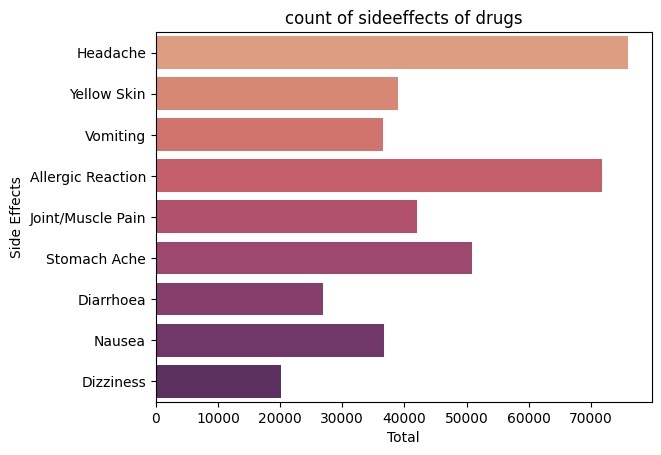

In [ ]:
sns.countplot(data = data, y = 'SideEffects',palette="flare")
plt.ylabel('Side Effects')
plt.xlabel('Total')
plt.title('count of sideeffects of drugs')
plt.show()

[76000, 71789, 50825, 42106, 38917, 36711, 36515, 26906, 20117]


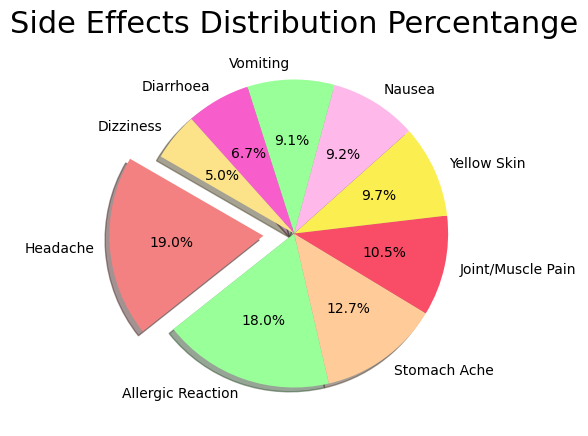

In [ ]:
# Side Effects Distribution- Single Pie chart
plt.figure(figsize=(5,5))
populations = data['SideEffects'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Headache','Allergic Reaction','Stomach Ache','Joint/Muscle Pain','Yellow Skin','Nausea','Vomiting','Diarrhoea','Dizziness'
explode = (0.2,0,0,0,0,0,0,0,0)  # explode 1st slice
# Plot
plt.title('Side Effects Distribution Percentange', fontsize=22)
plt.pie(pop_size, explode=explode,colors=['#F38181','#99ff99','#ffcc99','#F94C66','#FBEE51','#FEB8EA','#99ff99','#F75ECB','#FCE38A'], autopct='%1.1f%%',labels=pop_labels,
        shadow=True, startangle=150)

plt.show()

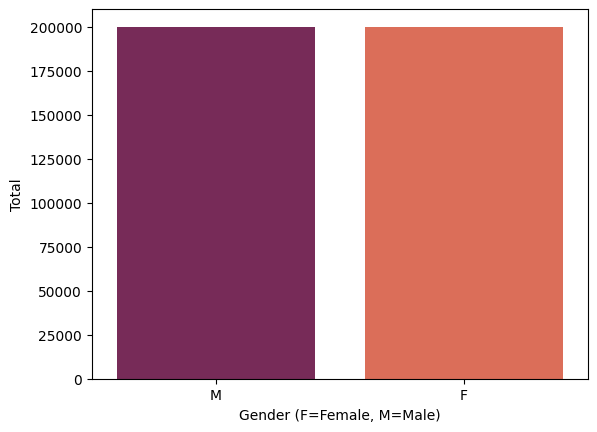

In [ ]:

sns.countplot(x="Gender", data=data, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

[200018, 199868]


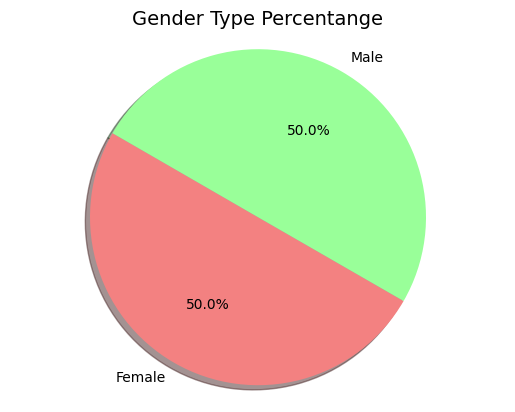

In [ ]:
# Gender and its values Single Pie chart
populations = data['Gender'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Female','Male'
colors = ['#F38181','#99ff99']
# Plot
plt.title('Gender Type Percentange', fontsize=14)
plt.pie(pop_size, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.show()

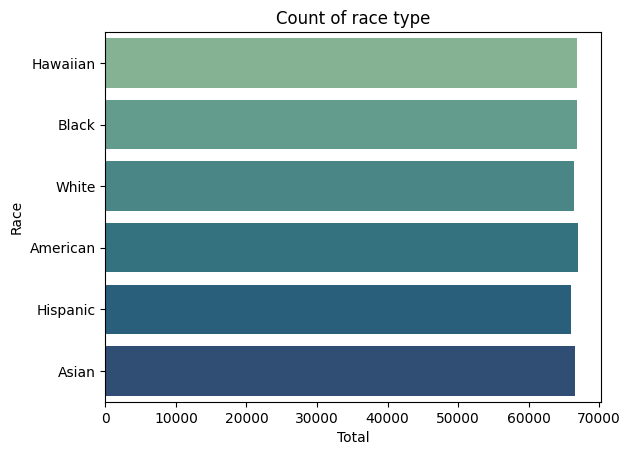

In [ ]:

sns.countplot(y="Race", data=data, palette="crest",)
plt.ylabel('Race')
plt.xlabel('Total')
plt.title('Count of race type')
plt.show()

[66974, 66933, 66896, 66601, 66486, 65996]


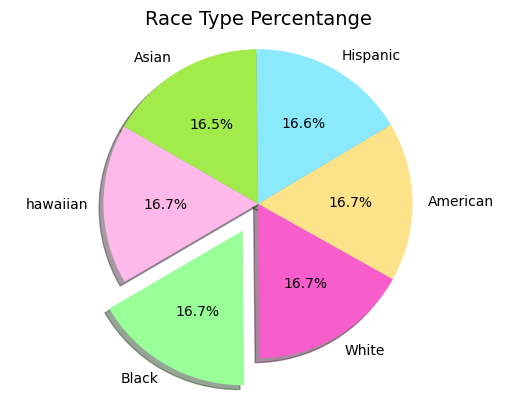

In [ ]:
# Race types and its values Single Pie chart
populations = data['Race'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'hawaiian','Black','White','American','Hispanic','Asian'
colors = ['#FEB8EA','#99ff99','#F75ECB','#FCE38A','#8ae9fc','#a1eb4b']
explode = (0, 0.2,0,0,0,0)  # explode 1st slice
# Plot
plt.title('Race Type Percentange', fontsize=14)
plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.show()

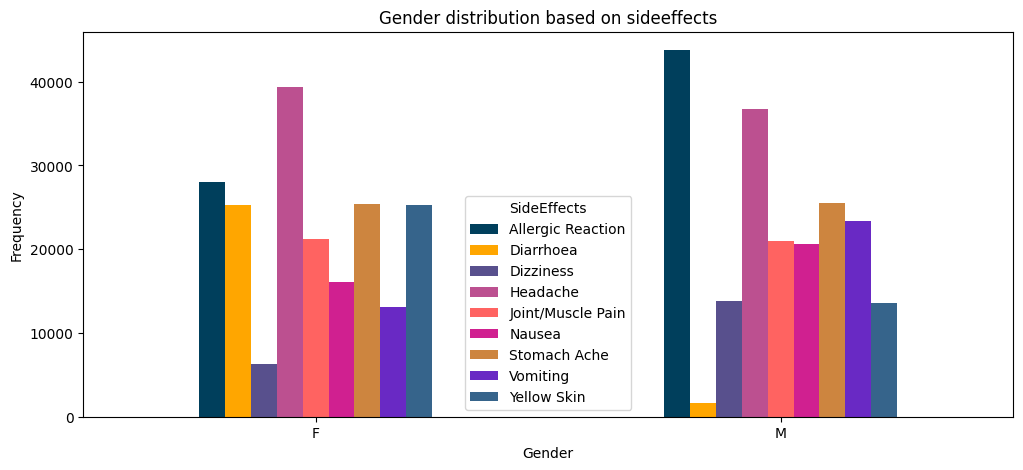

In [ ]:
pd.crosstab(data.Gender,data.SideEffects).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361','#D02090','#CD853F','#6929c4','#36648B'])

plt.title('Gender distribution based on sideeffects')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()
#,color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361']

<ipython-input-25-ce14ca3dc792>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0,0])


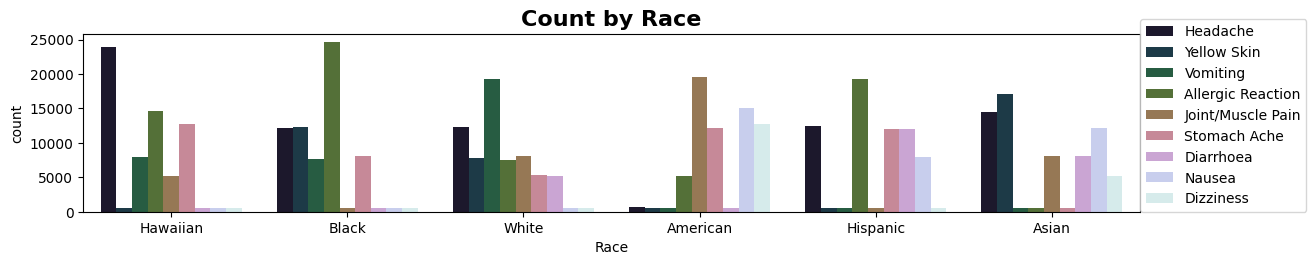

In [ ]:

import matplotlib.gridspec as gridspec
f, ax = plt.subplots(figsize=(30, 30))
gs = gridspec.GridSpec(11, 2)
ax = plt.subplot(gs[0,0])
sns.countplot(x=data['Race'], hue=data['SideEffects'], ax=ax, palette = "cubehelix")
ax.set_title('Count by Race', fontweight="bold", fontsize=16)
ax.legend(loc=(1,0))

In [ ]:
df= ['Gender','Race','SideEffects']
from sklearn.preprocessing import LabelEncoder
data[df] = data[df].apply(LabelEncoder().fit_transform)
data.head()


,Name,Age,Gender,Race,SideEffects
0,Dakota Soto,62,1,3,3
1,Rachael Rubio,69,0,2,8
2,Heather Giles,47,1,5,7
3,Russell Malone,82,1,2,0
4,Tina Quinn,76,1,3,3


In [ ]:
feature_names = ['Age', 'Gender', 'Race']
X = data[feature_names]
y = data['SideEffects']

##Modelling


In [ ]:
# Machine Learning Classification tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create Training and Test Sets and Apply Scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('x_train shape:', X_train.shape, '\nx_test shape:', X_test.shape, '\ny_train shape:',y_train.shape, '\ny_test shape:', y_test.shape)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x_train shape: (319908, 3) 
x_test shape: (79978, 3) 
y_train shape: (319908,) 
y_test shape: (79978,)


#Logistic model

In [ ]:
# Classifier: Logistic regression
logreg = LogisticRegression(random_state=0, max_iter=X.shape[0])
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=399886, random_state=0)

In [ ]:
# Predicting results using Test data set
lrpred= logreg.predict(X_test)
lrpred

array([5, 3, 0, ..., 3, 0, 4])

In [ ]:
# confusion matrix
lrconfusion = confusion_matrix(y_test,lrpred)
print("\n\nConfusion matrix: \n\n",lrconfusion)



Confusion matrix: 

 [[6644 1603   46 4947  986   39    0   35   20]
 [ 153 1511   36 1918 1556   38    0   66   19]
 [ 151   79 2461  224 1018   41    0   38   25]
 [3326 1996   46 7011  934  585    0 1274   16]
 [1063 1570 1737  197  348 1220    0   46 2178]
 [3506   79 1201  812 1845   30    0   45   22]
 [1070 2144   54 3193  916 1764    0  984   11]
 [3056   64   55 2507   67   50    0 1460   18]
 [ 152   71   64 5024   68 1002    0 1421   22]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
lraccuracy = accuracy_score(y_test,lrpred)
lrf1_score = f1_score(y_test, lrpred,average='micro')
lrprecision = precision_score(y_test, lrpred,average='micro')
lrrecall = recall_score(y_test, lrpred,average='micro')
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([lraccuracy,lrprecision,lrrecall,lrf1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
print("\n\nLogistic classifier: \n")
x



Logistic classifier: 



,result,values
0,Accuracy,0.244
1,Precision,0.244
2,Recall,0.244
3,F1 Score,0.244


#Decision Tree

In [ ]:
# Classifier: Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting results using Test data set
clfpred = clf.predict(X_test)
clfpred

array([4, 3, 7, ..., 6, 5, 0])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
clfconfusion = confusion_matrix(y_test,clfpred)
print("\n\nConfusion matrix: \n\n",clfconfusion)



Confusion matrix: 

 [[13785    47    28   144    68    53    87    52    56]
 [  115  4688    20   117    69    64    83    68    73]
 [  131    48  3400   132    67    57    90    54    58]
 [  128    46    28 14625    69    75    84    70    63]
 [  116    41    42   130  7757    64    81    64    64]
 [  134    36    23   130    80  6931    85    59    62]
 [  129    50    34   124    62    42  9568    64    63]
 [  117    52    31   125    79    61    87  6667    58]
 [  114    48    31   142    83    62    73    69  7202]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
clfaccuracy = accuracy_score(y_test,clfpred)
clff1_score = f1_score(y_test, clfpred,average='micro')
clfprecision = precision_score(y_test, clfpred,average='micro')
clfrecall = recall_score(y_test, clfpred,average='micro')
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([clfaccuracy,clfprecision,clfrecall,clff1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
print("\n\nDecision Tree: \n")
x



Decision Tree: 



,result,values
0,Accuracy,0.933
1,Precision,0.933
2,Recall,0.933
3,F1 Score,0.933


#K-NN

In [ ]:

# Classifier: K-Nearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting results using Test data set
knnpred = knn.predict(X_test)
knnpred

array([4, 3, 7, ..., 6, 5, 0])

In [ ]:
# confusion matrix
knnconfusion = confusion_matrix(y_test,knnpred)
print("\nConfusion matrix: \n",knnconfusion)


Confusion matrix: 
 [[13785    47    28   144    68    53    87    52    56]
 [  115  4688    20   117    69    64    83    68    73]
 [  131    48  3400   132    67    57    90    54    58]
 [  128    46    28 14625    69    75    84    70    63]
 [  116    41    42   130  7757    64    81    64    64]
 [  134    36    23   130    80  6931    85    59    62]
 [  129    50    34   124    62    42  9568    64    63]
 [  117    52    31   125    79    61    87  6667    58]
 [  114    48    31   142    83    62    73    69  7202]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
knnaccuracy = accuracy_score(y_test,knnpred)
knnf1_score = f1_score(y_test,knnpred,average='micro')
knnprecision = precision_score(y_test, knnpred,average='micro')
knnrecall = recall_score(y_test,knnpred,average='micro')
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([knnaccuracy,knnprecision,knnrecall,knnf1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
x

,result,values
0,Accuracy,0.933
1,Precision,0.933
2,Recall,0.933
3,F1 Score,0.933


#comparing results

In [ ]:
accuracy = np.round(np.array([lraccuracy, knnaccuracy, clfaccuracy]),3)
precision =np.round(np.array([lrprecision, knnprecision, clfprecision]),3)
recall =np.round( np.array([lrrecall, knnrecall, clfrecall]),3)
f_1 = np.round(np.array([lrf1_score, knnf1_score, clff1_score]),3)
models = np.array(['Logistic Regression', 'KNN', 'decision tree'])
results = pd.DataFrame(np.column_stack((models, accuracy, precision, recall, f_1)),
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.244,0.244,0.244,0.244
1,KNN,0.933,0.933,0.933,0.933
2,decision tree,0.933,0.933,0.933,0.933


In [ ]:
# From the scores we can say that KNN,Decision tree are good models